## Neural Networks

### This exercise is to create a neural network that plays the role of XOR using back propagatoin algorithm.

In [1]:
import numpy as np
np.set_printoptions(precision=6)

### Activation  Functions

In [2]:
def sigmoid(v):
    return (1 / (1+ np.exp(-v)) )

In [3]:
def MSE(y, yhat):
    m =len(y)
    err = 0.0
    for i in range(m):
        err += np.square(y[i]-yhat[i])
    err = (1/2*m)*err
    return(err)

### Add bias to each input in all layers except the output layer.

In [4]:
def add_bias(X_):
    return np.append(X_,1)

### Forward Propagation 

In [5]:
def forward_prop(W_,X_,fn=sigmoid):
    if W_.shape[1] != X_.shape[0]:
        print("The matrix columns and the input length are not similar.")
        return
    output = fn(np.matmul(W_,X_)) #the sigmoid of the scalar product of X and column i of W
    return output

### Delta of the output layer function

In [6]:
def delta_output_layer_fn(W_output_, desired_, Y_in_, a=1):
    output_ = forward_prop(W_output_,Y_in_)
    delta_output_layer = a * (desired - output_) * output_ * (1- output_)    
    return delta_output_layer

In [7]:
#Take X as input matrix not one by on

### Delta of the inner layers function

In [8]:
def delta_hidden_layer_fn(W_local, W_next, X_input, delta_next):
    Y_j = forward_prop(W_local,X_input)
    r_local , c_local = W_local.shape
    r_next, c_next = W_next.shape
    delta_hidden = np.zeros(r_local)
    for j in range(r_local):
        delta_j_next_sum = 0
        for k in range(r_next):
            delta_j_next_sum += delta_next[k] * W_next[k,j]
        delta_hidden[j] = a * Y_j[j] * (1-Y_j[j]) * delta_j_next_sum
    return delta_hidden

### We know that2 layers: L1(2 neurons) and L2 (1 neuron) are enough to create XOR.

In [9]:
input_length = 2
L1_neuron_nb = 2
L2_neuron_nb = 1
np.random.seed(10)

In [117]:
X_train = np.array( [ [0,0], [0,1.0], [1,0], [1,1] ] )
Y_train = np.array( [0,1.0,1,0])

### W1 and W2 are the 2 matricies representing L1 and L2.

In [121]:
#Forwarad prop to get Y1, output
W1 = np.random.rand(L1_neuron_nb , input_length +1) 
W2 = np.random.rand(L2_neuron_nb , L1_neuron_nb +1 )  

[[0.384114 0.944261 0.987625]
 [0.456305 0.826123 0.251374]]
[[0.597372 0.902832 0.534558]]


### Back Propagation with activation = sigmoid

In [122]:
a = 1
eta = 0.3

In [123]:
epochs = 50
MSE_array = np.zeros(epochs)
m = X_train.shape[0]

for e in range(epochs):
    MSE_e = 0
    for i in range(X_train.shape[0]):
        X1 = add_bias(X_train[i,:])
        desired = Y_train[i]
        Y1 =  add_bias(forward_prop(W1,X1))
        output_ = forward_prop(W2,Y1)
        
        r1,c1 = W1.shape
        r2,c2 = W2.shape
        
        delta_j_output = delta_output_layer_fn(W2,desired, Y1)
        for i in range(c2):
            for j in range(r2):
                W2[j,i] = W2[j,i] +( eta *  delta_j_output[j] * Y1[i])

        delta_j_1 = delta_hidden_layer_fn(W1,W2,X1,delta_j_output)
        for i in range(c1):
            for j in range(r1):
                W1[j,i] = W1[j,i] +(eta * delta_j_1[j] * X1[i])
        MSE_e += np.square(desired -output_)
        i+=1
    MSE_e /= m
    #print(MSE_e)
    MSE_array[e] = MSE_e
    e+=1

### Plot the MSE of each epoch

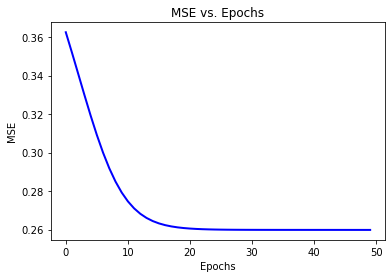

In [124]:
import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('MSE') 
#plt.xticks(x)
plt.title('MSE vs. Epochs') 
x = np.arange(0,epochs,1)
plt.plot(x,MSE_array,color='blue', linewidth=2, markersize=12)

#### 10 epcohs were enough to converge

### Test the notwork

### a simle predict funciton to test the inputs.

In [107]:
def model_predict(X_):
    X_ = add_bias(X_) 
    Y1_ = add_bias(forward_prop(W1, X_))  
    output_ = forward_prop(W2,Y1_)
    return output_

### Predict (0,0)

In [108]:
model_predict(np.array([0,0]) )

array([0.017022])

### Predict (0,1)


In [109]:
model_predict(np.array([0,1]) )

array([0.985304])

### Predict (1,0)


In [110]:
model_predict(np.array([1,0]) )

array([0.985388])

### Predict (1,1)


In [111]:
model_predict(np.array([1,1]) )

array([0.015177])

## ALL the use cases are correct